In [653]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

Cálculos computacionales para el trabajo académico física estadística.

Por Ainoo Pérez, Debinamaca, Nieto Pérez, Marco, Mompó Ruiz, Lluis, Molina O'Brien, Marcos, Osa Bonillo, Matilde and Regal Sevilla, Mateo 

## Caso: E vibración rango completo de T

In [654]:
h,w,B = sp.symbols('h,w,B',positive=True)
Zvib = sp.exp(-B*h*w/2)/(1-sp.exp(-B*h*w))
Zvib

exp(-B*h*w/2)/(1 - exp(-B*h*w))

In [655]:
Evib = -sp.simplify(sp.diff(sp.log(Zvib),B))
Evib

h*w/(2*tanh(B*h*w/2))

In [656]:
k,T = sp.symbols('k,T',positive=True)
Evib = Evib.subs(B,1/(k*T))
Evib

h*w/(2*tanh(h*w/(2*T*k)))

In [657]:
Cv = sp.diff(Evib,T)
Cv

h**2*w**2*(1 - tanh(h*w/(2*T*k))**2)/(4*T**2*k*tanh(h*w/(2*T*k))**2)

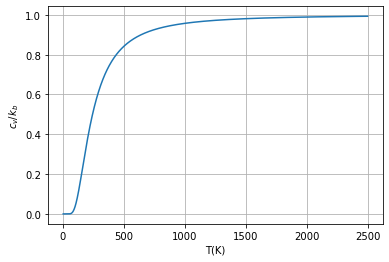

In [658]:
Tn = np.linspace(0,2500,1000)
Cv = Cv.subs(h*w,10**-20).subs(k,1.38e-23)/1.38e-23
C_v = []
for i in Tn:
    C_v.append(Cv.subs(T,i))
plt.plot(Tn,C_v)
plt.ylabel('$c_v$/$k_b$')
plt.xlabel('T(K)')

plt.grid()

## Caso: E rot rango T altas

In [659]:
u,r0 = sp.symbols('u,r0',positive=True)
Zrot = 8*sp.pi**2*u*r0**2/(B*h**2)
Zrot

8*pi**2*r0**2*u/(B*h**2)

In [660]:
Erot = -sp.simplify(sp.diff(sp.log(Zrot),B))
Erot

1/B

In [661]:
Erot = Erot.subs(B,1/(k*T))
Erot

T*k

In [662]:
Cv_rot_alta = sp.diff(Erot,T)
Cv_rot_alta

k

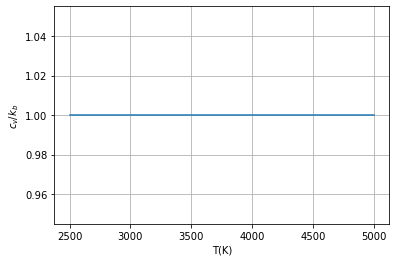

In [663]:
Tn_altas = np.linspace(2500,5000,1000)
Cv_rot_alta = Cv_rot_alta.subs(k,1.38e-23)/1.38e-23
Cv_rot_alta = [Cv_rot_alta]
C_v_rot_alta = Cv_rot_alta *len(Tn_altas)
plt.plot(Tn_altas,C_v_rot_alta)
plt.ylabel('$c_v$/$k_b$')
plt.xlabel('T(K)')
plt.grid()

## Caso: E rot rango T bajas (2 términos)

In [664]:
Zrot2 = 1+3*sp.exp(-B*h**2/(2*u*r0**2))
Erot2 = -sp.simplify(sp.diff(sp.log(Zrot2),B))
Erot2

3*h**2/(2*r0**2*u*(exp(B*h**2/(2*r0**2*u)) + 3))

In [665]:
Erot2 = Erot2.subs(B,1/(k*T))
Erot2

3*h**2/(2*r0**2*u*(exp(h**2/(2*T*k*r0**2*u)) + 3))

In [666]:
Cv_rot_baja = sp.simplify(sp.diff(Erot2, T))
Cv_rot_baja

3*h**4*exp(h**2/(2*T*k*r0**2*u))/(4*T**2*k*r0**4*u**2*(exp(h**2/(2*T*k*r0**2*u)) + 3)**2)

0


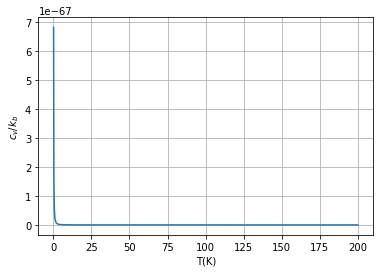

In [667]:
Tn_bajas = np.linspace(0,200,1000)
Cv_rot_baja = Cv_rot_baja.subs(k,1.38e-23).subs(h,6.626e-34/(2*np.pi)).subs(u*r0**2,1.05456e-12)/1.38e-23
C_v_rot_baja = []
for i in Tn_bajas:
    C_v_rot_baja.append(Cv_rot_baja.subs(T,i))
plt.plot(Tn_bajas, C_v_rot_baja)
plt.ylabel('$c_v$/$k_b$')
plt.xlabel('T(K)')
plt.grid()

print (sp.limit(Cv_rot_baja, T, 0))

## Caso: E rot + vib rango T bajas

In [668]:
Z = Zvib*Zrot2
Z

(1 + 3*exp(-B*h**2/(2*r0**2*u)))*exp(-B*h*w/2)/(1 - exp(-B*h*w))

In [669]:
E = -sp.simplify(sp.diff(sp.log(Z),B)).subs(B,1/(k*T))
Cv_bajas = sp.diff(E,T)
Cv_bajas

h*(-h**2*w*(exp(h*w/(T*k)) - 1)*exp(h**2/(2*T*k*r0**2*u))/(2*T**2*k) - 3*h**2*w*exp(h*w/(T*k))/(T**2*k) - h**2*w*exp(h**2/(2*T*k*r0**2*u))/(T**2*k) - h*r0**2*u*w**2*(exp(h**2/(2*T*k*r0**2*u)) + 3)*exp(h*w/(T*k))/(T**2*k))/(2*r0**2*u*(exp(h*w/(T*k)) - 1)*(exp(h**2/(2*T*k*r0**2*u)) + 3)) + h**3*(3*h*(exp(h*w/(T*k)) - 1) + r0**2*u*w*(exp(h*w/(T*k)) - 1)*(exp(h**2/(2*T*k*r0**2*u)) + 3) + 2*r0**2*u*w*(exp(h**2/(2*T*k*r0**2*u)) + 3))*exp(h**2/(2*T*k*r0**2*u))/(4*T**2*k*r0**4*u**2*(exp(h*w/(T*k)) - 1)*(exp(h**2/(2*T*k*r0**2*u)) + 3)**2) + h**2*w*(3*h*(exp(h*w/(T*k)) - 1) + r0**2*u*w*(exp(h*w/(T*k)) - 1)*(exp(h**2/(2*T*k*r0**2*u)) + 3) + 2*r0**2*u*w*(exp(h**2/(2*T*k*r0**2*u)) + 3))*exp(h*w/(T*k))/(2*T**2*k*r0**2*u*(exp(h*w/(T*k)) - 1)**2*(exp(h**2/(2*T*k*r0**2*u)) + 3))

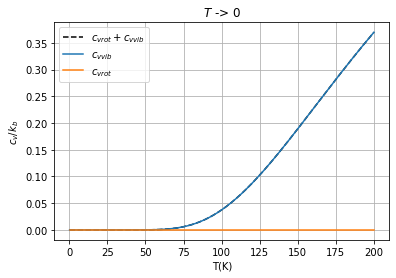

In [670]:

Cv_bajas = Cv_bajas.subs(k,1.38e-23).subs(h,6.626e-34/(2*np.pi)).subs(u*r0**2,1.05456e-12).subs(w,9.482621955e13)/1.38e-23
C_v_bajas = []
for i in Tn_bajas:
    C_v_bajas.append(Cv_bajas.subs(T,i))

C_v = []
for i in Tn_bajas:
    C_v.append(Cv.subs(T,i))


plt.plot(Tn_bajas, C_v_bajas, "k", linestyle='dashed', label= '$c_{vrot} + c_{vvib}$')
plt.plot(Tn_bajas, C_v, label= '$c_{vvib}$')
plt.plot(Tn_bajas, C_v_rot_baja, label= '$c_{vrot}$' )
plt.ylabel('$c_v$/$k_b$')
plt.title('$T$ -> $ 0 $')
plt.xlabel('T(K)')
plt.legend()
plt.grid()

## Caso: E rot + vib rango T altas

In [671]:
Z = Zvib*Zrot
Z

8*pi**2*r0**2*u*exp(-B*h*w/2)/(B*h**2*(1 - exp(-B*h*w)))

In [672]:
E = -sp.simplify(sp.diff(sp.log(Z),B)).subs(B,1/(k*T))
Cv_altas = sp.diff(E,T)
Cv_altas

T*k*(-3*h*w*exp(h*w/(T*k))/(T**2*k) - h*w/(T**2*k) - h**2*w**2*exp(h*w/(T*k))/(T**3*k**2))/(2*(exp(h*w/(T*k)) - 1)) + k*(2*exp(h*w/(T*k)) - 2 + h*w*exp(h*w/(T*k))/(T*k) + h*w/(T*k))/(2*(exp(h*w/(T*k)) - 1)) + h*w*(2*exp(h*w/(T*k)) - 2 + h*w*exp(h*w/(T*k))/(T*k) + h*w/(T*k))*exp(h*w/(T*k))/(2*T*(exp(h*w/(T*k)) - 1)**2)

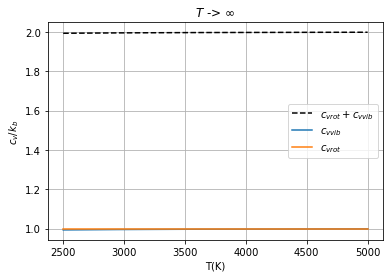

In [673]:
Cv_altas = Cv_altas.subs(k,1.38e-23).subs(h,6.626e-34/(2*np.pi)).subs(u*r0**2,1.05456e-12).subs(w,9.482621955e13)/1.38e-23
C_v_altas = []
for i in Tn_altas:
    C_v_altas.append(Cv_altas.subs(T,i))

C_v = []
for i in Tn_altas:
    C_v.append(Cv.subs(T,i))

plt.plot(Tn_altas, C_v_altas, "k", linestyle='dashed', label= '$c_{vrot} + c_{vvib}$' )

plt.plot(Tn_altas, C_v, label= '$c_{vvib}$')
plt.plot(Tn_altas, C_v_rot_alta, label= '$c_{vrot}$' )
plt.ylabel('$c_v$/$k_b$')
plt.title('$T$ -> $ \infty $')
plt.xlabel('T(K)')
plt.legend()
plt.grid()
plt.show()